#### Importing Packages 

In [103]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#### Import and explore the data

In [2]:
df1 = pd.read_csv('signal-data.csv')
df1.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
df1.shape

(1567, 592)

#### Data cleansing 

In [4]:
df1.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [5]:
for col in df1.columns:
    check = df1[col].isnull().values.any()
    if (check == True):
        print(col,' - ', check)

0  -  True
1  -  True
2  -  True
3  -  True
4  -  True
5  -  True
6  -  True
7  -  True
8  -  True
9  -  True
10  -  True
11  -  True
12  -  True
13  -  True
14  -  True
15  -  True
16  -  True
17  -  True
18  -  True
19  -  True
21  -  True
22  -  True
23  -  True
24  -  True
25  -  True
26  -  True
27  -  True
28  -  True
29  -  True
30  -  True
31  -  True
32  -  True
33  -  True
34  -  True
35  -  True
36  -  True
37  -  True
38  -  True
39  -  True
40  -  True
41  -  True
42  -  True
43  -  True
44  -  True
45  -  True
46  -  True
47  -  True
48  -  True
49  -  True
50  -  True
51  -  True
52  -  True
53  -  True
54  -  True
55  -  True
56  -  True
57  -  True
58  -  True
59  -  True
60  -  True
61  -  True
62  -  True
63  -  True
64  -  True
65  -  True
66  -  True
67  -  True
68  -  True
69  -  True
70  -  True
71  -  True
72  -  True
73  -  True
74  -  True
75  -  True
76  -  True
77  -  True
78  -  True
79  -  True
80  -  True
81  -  True
82  -  True
83  -  True
84  -  True
85

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [7]:
df1['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

#### Missing value Treatment 

In [8]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')

In [9]:
df = df1.iloc[: , 1:]

In [10]:
imp_mean.fit(df)
df_transformed = imp_mean.transform(df)
df_transformed

array([[ 3.0309300e+03,  2.5640000e+03,  2.1877333e+03, ...,
         4.6000000e-03,  7.1900500e+01, -1.0000000e+00],
       [ 3.0957800e+03,  2.4651400e+03,  2.2304222e+03, ...,
         6.0000000e-03,  2.0820450e+02, -1.0000000e+00],
       [ 2.9326100e+03,  2.5599400e+03,  2.1864111e+03, ...,
         1.4800000e-02,  8.2860200e+01,  1.0000000e+00],
       ...,
       [ 2.9788100e+03,  2.3797800e+03,  2.2063000e+03, ...,
         2.5000000e-03,  4.3523100e+01, -1.0000000e+00],
       [ 2.8949200e+03,  2.5320100e+03,  2.1770333e+03, ...,
         7.5000000e-03,  9.3494100e+01, -1.0000000e+00],
       [ 2.9449200e+03,  2.4507600e+03,  2.1954444e+03, ...,
         4.5000000e-03,  1.3778440e+02, -1.0000000e+00]])

In [11]:
df_transformed_dataframe = pd.DataFrame(df_transformed)
df_transformed_dataframe.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
586    0
587    0
588    0
589    0
590    0
Length: 591, dtype: int64

In [12]:
for col in df_transformed_dataframe.columns:
    check = df_transformed_dataframe[col].isnull().values.any()
    if (check == True):
        print(col,' - ', check)

In [13]:
for col in df_transformed_dataframe.columns:
    check = df_transformed_dataframe[col].isna().values.any()
    if (check == True):
        print(col,' - ', check)

In [14]:
df_transformed_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, 0 to 590
dtypes: float64(591)
memory usage: 7.1 MB


In [15]:
df_transformed_dataframe.columns

RangeIndex(start=0, stop=591, step=1)

In [16]:
df_transformed_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1.0


In [17]:
df_transformed_dataframe.iloc[:,590]

0      -1.0
1      -1.0
2       1.0
3      -1.0
4      -1.0
       ... 
1562   -1.0
1563   -1.0
1564   -1.0
1565   -1.0
1566   -1.0
Name: 590, Length: 1567, dtype: float64

#### Normalizing the data 

In [18]:
# independant variables
X = df_transformed_dataframe.iloc[:,0:590]
# the dependent variable
y = df_transformed_dataframe.iloc[:,590]

In [19]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head(100)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.224463,0.849523,-0.436430,0.035804,-0.050121,NaN,-0.564354,0.265894,0.509848,1.128455,...,-0.138300,-0.179550,0.118679,-0.204833,-0.093165,-0.197057,-0.077554,-0.190165,-0.238334,-0.295753
1,1.107287,-0.383106,1.016977,0.155282,-0.059585,NaN,0.197639,0.321868,0.457021,0.022620,...,0.516737,2.233265,0.530183,0.406734,0.444748,0.385113,-0.960123,0.411970,0.250272,1.156846
2,-1.114000,0.798901,-0.481447,0.688278,-0.047447,NaN,-0.906768,0.254699,-0.260885,0.327222,...,4.950839,0.008115,-1.262799,0.022320,0.014418,0.029888,2.991195,3.627143,3.321511,-0.178955
3,-0.350156,-0.199072,-0.051705,-1.104376,-0.050831,NaN,0.502662,-0.013974,0.343240,-0.765369,...,-0.289463,-0.151957,-0.322218,-0.292200,-0.362121,-0.283360,-0.101845,-0.178804,-0.308135,-0.275049
4,0.242296,0.087328,1.117227,-0.156616,-0.047033,NaN,-0.115954,0.187531,0.545066,-0.149545,...,-0.138300,-0.179550,-5.906917,26.867221,27.071429,26.913337,-0.101845,-0.178804,-0.308135,-0.275049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.907035,0.811993,-0.694425,0.971405,-0.051945,NaN,-0.481292,0.478594,0.568093,-0.659421,...,-0.138300,-0.179550,0.030500,-0.321322,-0.308330,-0.309565,0.505427,1.741211,1.541588,0.160893
96,-0.300059,-0.359042,-0.302512,-0.654884,-0.050251,NaN,0.371625,-0.137116,0.493594,-0.546851,...,0.617512,1.950897,-0.145859,1.006653,0.713704,0.967563,-0.968220,0.218832,0.320073,0.987335
97,0.474676,-0.524249,2.200661,0.784509,-0.048137,NaN,-0.117211,0.042000,0.922983,0.095460,...,-0.138300,-0.179550,-0.087073,0.121336,0.283374,0.118121,-0.968220,0.218832,0.320073,0.987335
98,-0.040180,0.524097,-0.582071,-0.999498,-0.054675,NaN,0.254748,0.053195,2.165096,0.466279,...,-0.138300,-0.179550,-1.350978,-0.251429,-0.173852,-0.239733,-0.968220,0.218832,0.320073,0.987335


In [20]:
for col in XScaled.columns:
    check = XScaled[col].isna().values.any()
    if (check == True):
        print(col,' - ', check)

5  -  True
13  -  True
42  -  True
49  -  True
52  -  True
69  -  True
97  -  True
141  -  True
149  -  True
178  -  True
179  -  True
186  -  True
189  -  True
190  -  True
191  -  True
192  -  True
193  -  True
194  -  True
226  -  True
229  -  True
230  -  True
231  -  True
232  -  True
233  -  True
234  -  True
235  -  True
236  -  True
237  -  True
240  -  True
241  -  True
242  -  True
243  -  True
256  -  True
257  -  True
258  -  True
259  -  True
260  -  True
261  -  True
262  -  True
263  -  True
264  -  True
265  -  True
266  -  True
276  -  True
284  -  True
313  -  True
314  -  True
315  -  True
322  -  True
325  -  True
326  -  True
327  -  True
328  -  True
329  -  True
330  -  True
364  -  True
369  -  True
370  -  True
371  -  True
372  -  True
373  -  True
374  -  True
375  -  True
378  -  True
379  -  True
380  -  True
381  -  True
394  -  True
395  -  True
396  -  True
397  -  True
398  -  True
399  -  True
400  -  True
401  -  True
402  -  True
403  -  True
404  - 

In [21]:
XScaled_New = XScaled.fillna(0)
XScaled_New.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.224463,0.849523,-0.436430,0.035804,-0.050121,0.0,-0.564354,0.265894,0.509848,1.128455,...,-0.138300,-0.179550,0.118679,-0.204833,-0.093165,-0.197057,-0.077554,-0.190165,-0.238334,-0.295753
1,1.107287,-0.383106,1.016977,0.155282,-0.059585,0.0,0.197639,0.321868,0.457021,0.022620,...,0.516737,2.233265,0.530183,0.406734,0.444748,0.385113,-0.960123,0.411970,0.250272,1.156846
2,-1.114000,0.798901,-0.481447,0.688278,-0.047447,0.0,-0.906768,0.254699,-0.260885,0.327222,...,4.950839,0.008115,-1.262799,0.022320,0.014418,0.029888,2.991195,3.627143,3.321511,-0.178955
3,-0.350156,-0.199072,-0.051705,-1.104376,-0.050831,0.0,0.502662,-0.013974,0.343240,-0.765369,...,-0.289463,-0.151957,-0.322218,-0.292200,-0.362121,-0.283360,-0.101845,-0.178804,-0.308135,-0.275049
4,0.242296,0.087328,1.117227,-0.156616,-0.047033,0.0,-0.115954,0.187531,0.545066,-0.149545,...,-0.138300,-0.179550,-5.906917,26.867221,27.071429,26.913337,-0.101845,-0.178804,-0.308135,-0.275049


In [22]:
covMatrix = np.cov(XScaled_New,rowvar=False)
print(covMatrix)

[[ 1.00063857 -0.1442531   0.00467002 ... -0.02588397 -0.02817903
   0.00418784]
 [-0.1442531   1.00063857  0.0058871  ...  0.01706713  0.00987425
   0.04458032]
 [ 0.00467002  0.0058871   1.00063857 ... -0.02930529 -0.03076289
  -0.03278414]
 ...
 [-0.02588397  0.01706713 -0.02930529 ...  1.00063857  0.97489778
   0.39108314]
 [-0.02817903  0.00987425 -0.03076289 ...  0.97489778  1.00063857
   0.389487  ]
 [ 0.00418784  0.04458032 -0.03278414 ...  0.39108314  0.389487
   1.00063857]]


#### Feature Reduction to 10 features

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(XScaled_New)

PCA(n_components=10)

The eigen Values

In [24]:
print(pca.explained_variance_)

[26.3633688  17.27438861 13.39231156 12.06725723 10.38987125  9.85054332
  9.36477513  8.70169415  8.53585661  7.68420793]


The eigen Vectors

In [25]:
print(pca.components_)

[[-6.07071556e-03 -6.83500741e-06 -3.85946387e-03 ... -4.09137085e-04
  -1.18301098e-04  1.50328041e-02]
 [-2.48798992e-02  1.29196641e-02  8.97667947e-03 ...  2.15979805e-02
   1.78776909e-02  1.74725279e-02]
 [-9.92488299e-03 -2.99290047e-03 -8.31532226e-03 ...  3.36430292e-04
   7.89214013e-04 -1.05873374e-02]
 ...
 [-9.61137773e-03  1.52403418e-03  1.41911225e-02 ...  3.52825918e-02
   3.56388727e-02  4.09592229e-02]
 [-1.68573812e-02 -1.64637768e-02  1.22467015e-02 ...  1.18327519e-02
   1.01174972e-02  4.72673069e-02]
 [ 7.64461489e-03 -4.86843815e-05  5.41826753e-02 ...  7.09436015e-03
   1.25860166e-02  3.88850657e-02]]


In [26]:
print(pca.explained_variance_ratio_)

[0.05558343 0.0364206  0.02823579 0.0254421  0.02190557 0.02076847
 0.0197443  0.01834629 0.01799664 0.01620106]


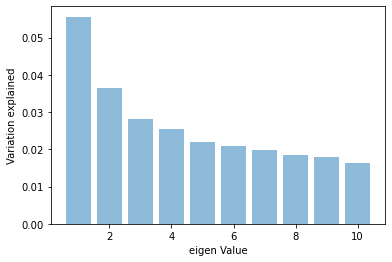

In [27]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

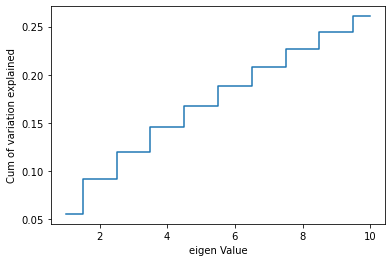

In [28]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Feature Reduction to 100 features 

In [29]:
pca = PCA(n_components=100)
pca.fit(XScaled_New)

PCA(n_components=100)

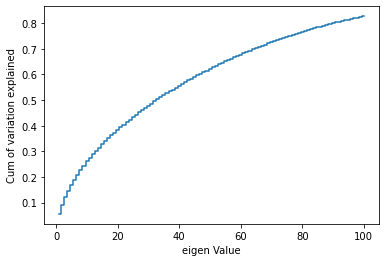

In [30]:
plt.step(list(range(1,101)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Accuracy Validation for 10 features 

In [31]:
pca_ = PCA(n_components=10)
pca_.fit(XScaled_New)
print(pca_.components_)
print(pca_.explained_variance_ratio_)
Xpca_ = pca_.transform(XScaled_New)

[[-6.07070990e-03 -6.87023426e-06 -3.85952562e-03 ... -4.09079246e-04
  -1.18245821e-04  1.50329029e-02]
 [-2.48759191e-02  1.29160650e-02  8.97725969e-03 ...  2.16001373e-02
   1.78797406e-02  1.74736290e-02]
 [-9.94464854e-03 -2.97439198e-03 -8.33317775e-03 ...  3.67158110e-04
   8.19988008e-04 -1.05732233e-02]
 ...
 [-8.76694101e-03  6.73206632e-04  1.47900392e-02 ...  3.54168642e-02
   3.57397007e-02  4.08921432e-02]
 [-1.72044021e-02 -1.60820524e-02  1.22625836e-02 ...  9.61493237e-03
   7.93059077e-03  4.61658736e-02]
 [ 5.43005670e-03  1.25900501e-03  5.50798519e-02 ...  7.18666369e-03
   1.27007523e-02  3.93958149e-02]]
[0.05558343 0.0364206  0.0282358  0.02544211 0.02190545 0.02076857
 0.01974503 0.01834465 0.0179952  0.01620778]


In [32]:
Xpca_

array([[-1.6947232 ,  2.92530395,  3.89128326, ...,  1.7809699 ,
        -0.0904426 ,  1.59286307],
       [-2.24725388,  0.87734563,  2.88234209, ...,  1.24022841,
        -1.64720481,  2.94765042],
       [ 0.44297442,  1.23235161,  1.14613078, ...,  0.37161683,
        -0.69116236,  2.65521664],
       ...,
       [-1.16963878, -1.77315267, -1.6195704 , ..., -1.05172463,
        -0.70660405, -0.58853822],
       [-1.17666024, -3.23485808, -3.49521795, ...,  0.53556834,
         0.61741816,  0.73200692],
       [ 1.95332848, -3.01270625, -2.61899695, ..., -1.39416486,
         4.14636688,  0.47971779]])

In [33]:
from sklearn.linear_model import LogisticRegression
regression_model = LogisticRegression()
regression_model.fit(XScaled_New, y)
regression_model.score(XScaled_New, y)

/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9814932992980216

In [34]:
regression_model_pca = LogisticRegression()
regression_model_pca.fit(Xpca_, y)
regression_model_pca.score(Xpca_, y)

0.9336311423101468

In [35]:
Xpca_df = pd.DataFrame(Xpca_)

#### Ploting the features to understand the correlation 

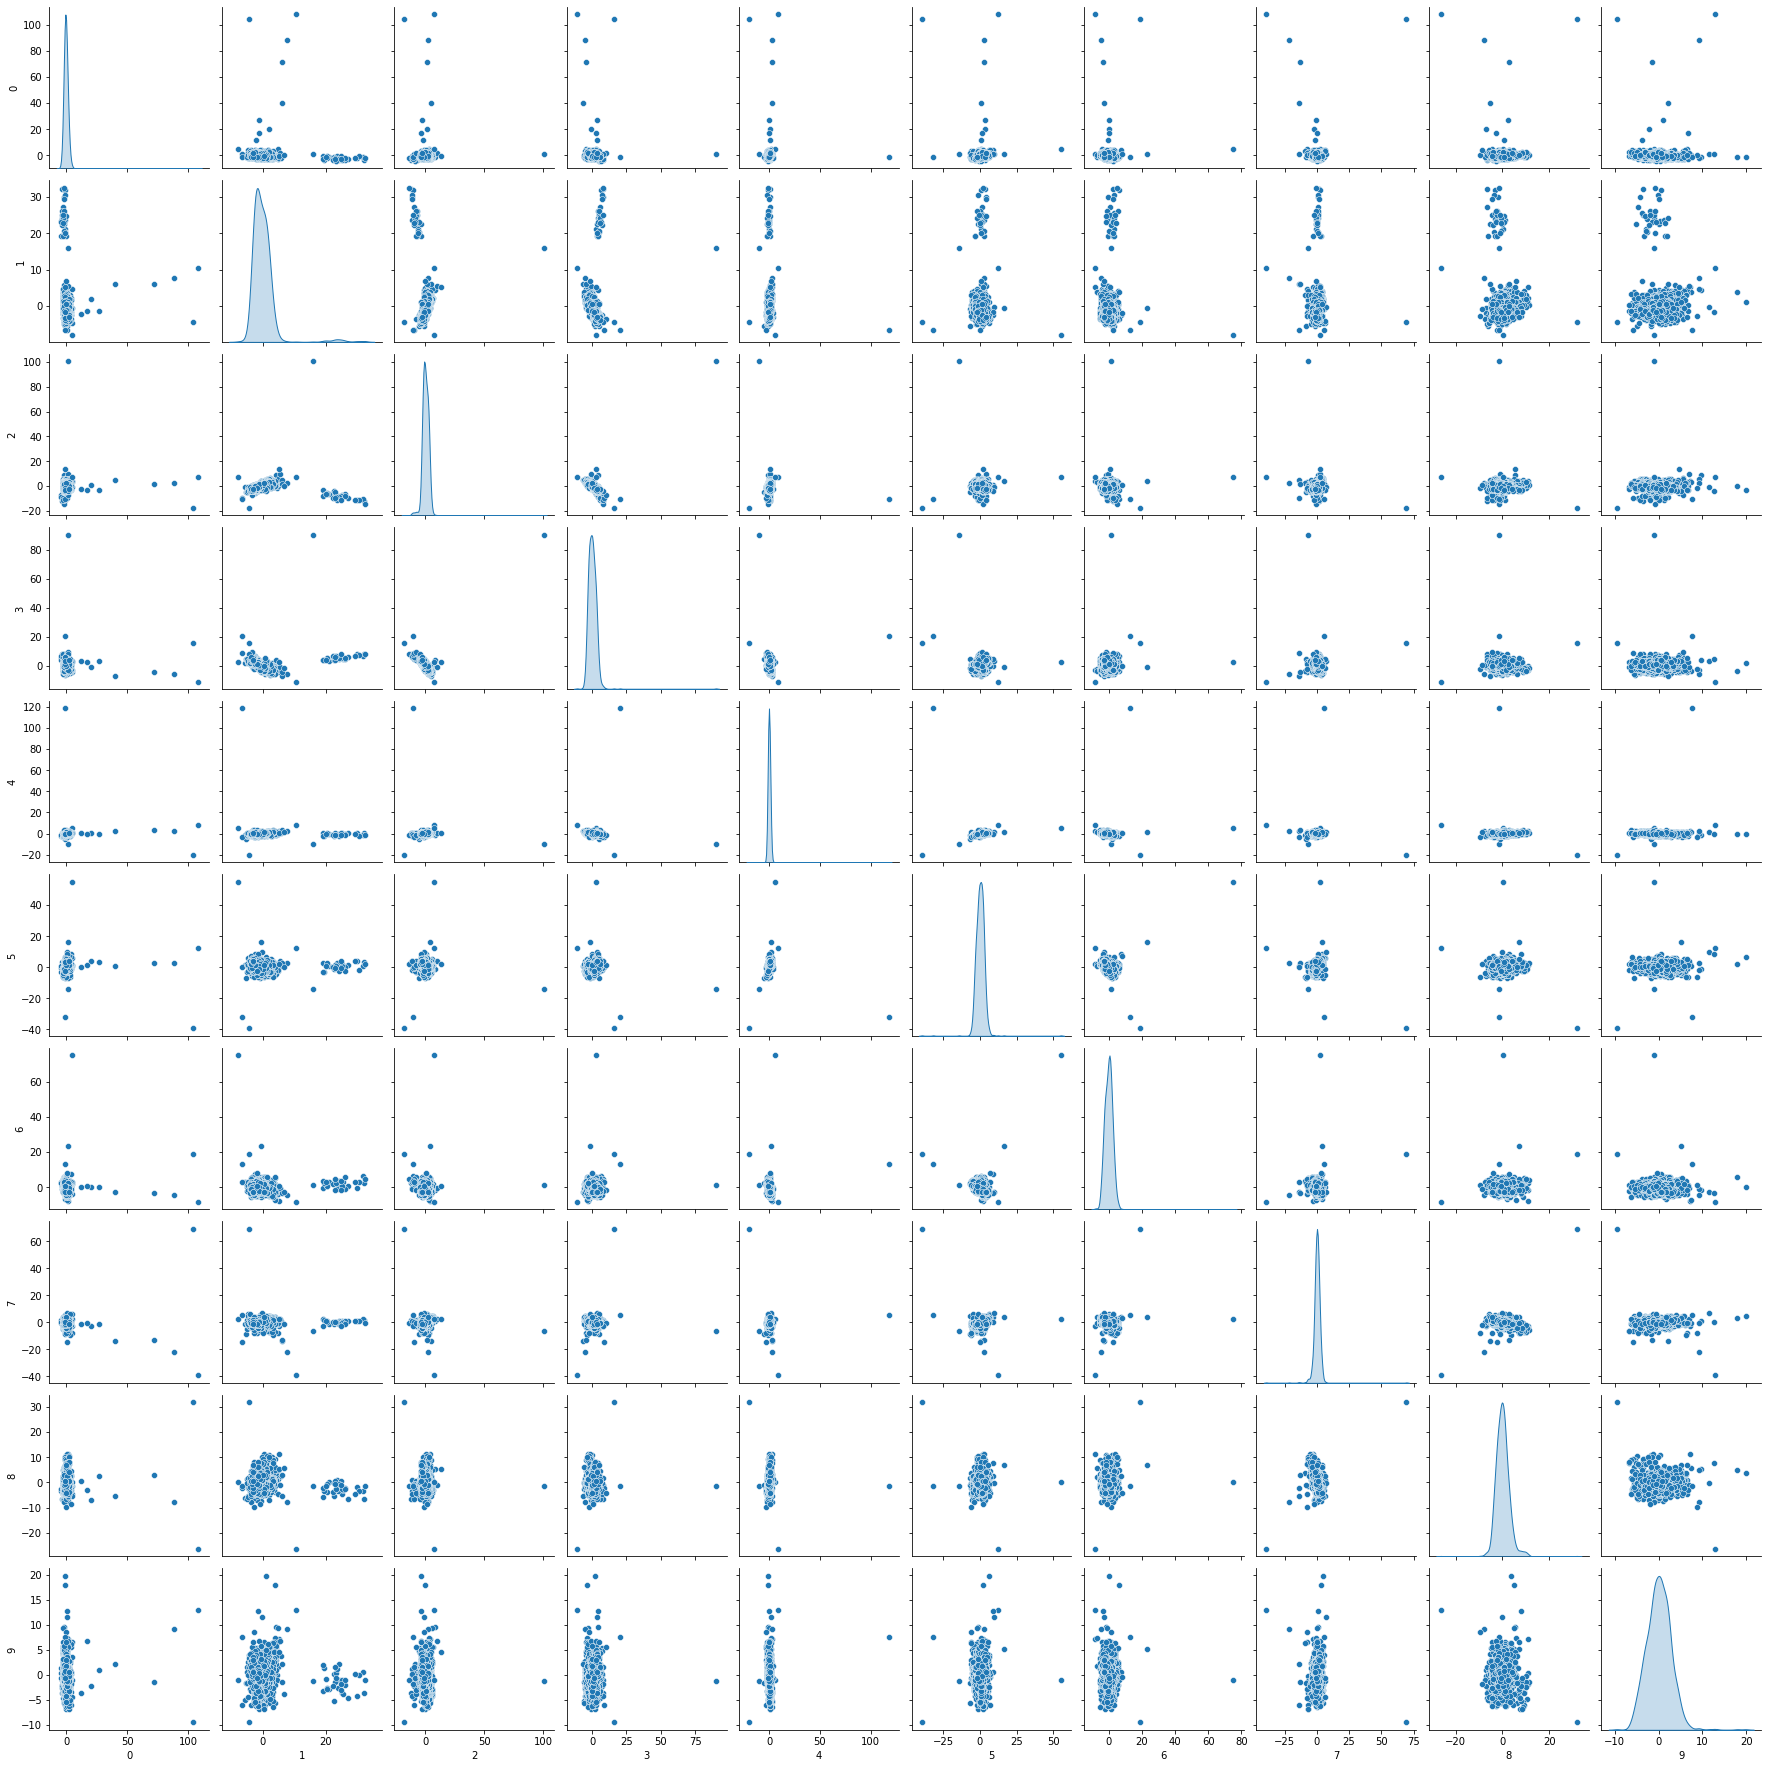

In [36]:
import seaborn as sns
sns.pairplot(Xpca_df , diag_kind = 'kde')

#### UpSampling the lower class

In [37]:
X = Xpca_
y = y.to_numpy()
print(X.shape)
print(y.shape)

(1567, 10)
(1567,)


In [38]:
type(y)

numpy.ndarray

In [39]:
test_size = 0.3 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [40]:
print("Before UpSampling, Fail - counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, Pass - counts of label '-1': {} \n".format(sum(y_train==-1)))

#from collections import Counter
#from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
#sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After UpSampling, Fail - counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, Pass - counts of label '-1': {} \n".format(sum(y_train_res==-1)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, Fail - counts of label '1': 81
Before UpSampling, Pass - counts of label '-1': 1015 

After UpSampling, Fail - counts of label '1': 1015
After UpSampling, Pass - counts of label '-1': 1015 

After UpSampling, the shape of train_X: (2030, 10)
After UpSampling, the shape of train_y: (2030,) 



#### Accuracy validation on data before upsampling 

In [41]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.9490445859872612


In [42]:
from sklearn import metrics
from sklearn.metrics import recall_score
test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

        -1.0       0.95      1.00      0.97       448
         1.0       0.00      0.00      0.00        23

    accuracy                           0.95       471
   macro avg       0.48      0.50      0.49       471
weighted avg       0.90      0.95      0.93       471

[[447   1]
 [ 23   0]]


#### Accuracy validation on data after upsampling 

In [43]:
# fit model on upsampled data 

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.5902335456475584
[[267 181]
 [ 12  11]]
              precision    recall  f1-score   support

        -1.0       0.96      0.60      0.73       448
         1.0       0.06      0.48      0.10        23

    accuracy                           0.59       471
   macro avg       0.51      0.54      0.42       471
weighted avg       0.91      0.59      0.70       471



#### Increasing the dimenionality from 10 to 15 

In [44]:
pca_ = PCA(n_components=15)
pca_.fit(XScaled_New)
print(pca_.components_)
print(pca_.explained_variance_ratio_)
Xpca_ = pca_.transform(XScaled_New)

[[-6.07080973e-03 -6.76255130e-06 -3.85957819e-03 ... -4.08971921e-04
  -1.18133832e-04  1.50329812e-02]
 [-2.48801709e-02  1.29194800e-02  8.97631929e-03 ...  2.15989124e-02
   1.78786339e-02  1.74734950e-02]
 [-9.92212526e-03 -2.99665109e-03 -8.32020644e-03 ...  3.58557947e-04
   8.10518987e-04 -1.05808722e-02]
 ...
 [-1.63410657e-02 -2.57594667e-03  3.35079676e-03 ... -8.97656555e-03
  -9.10936640e-03  2.69954798e-02]
 [-1.63779317e-02  1.81979277e-02 -2.49023917e-02 ... -4.49061837e-02
  -4.60465193e-02 -2.57558326e-02]
 [-1.07360968e-02  5.91038867e-03  2.22590575e-02 ... -3.34874913e-02
  -3.68250793e-02 -7.70191386e-03]]
[0.05558343 0.0364206  0.02823581 0.02544212 0.02190565 0.02076915
 0.01974507 0.01834641 0.01799608 0.01621379 0.01459839 0.01329628
 0.01310696 0.01276739 0.01260037]


In [45]:
X = Xpca_
y = y
print(X.shape)
print(y.shape)

(1567, 15)
(1567,)


In [46]:
test_size = 0.3 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [47]:
print("Before UpSampling, Fail - counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, Pass - counts of label '-1': {} \n".format(sum(y_train==-1)))

#from collections import Counter
#from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
#sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After UpSampling, Fail - counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, Pass - counts of label '-1': {} \n".format(sum(y_train_res==-1)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, Fail - counts of label '1': 81
Before UpSampling, Pass - counts of label '-1': 1015 

After UpSampling, Fail - counts of label '1': 1015
After UpSampling, Pass - counts of label '-1': 1015 

After UpSampling, the shape of train_X: (2030, 15)
After UpSampling, the shape of train_y: (2030,) 



In [48]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.9511677282377919


#### Accuracy validation on data after upsampling on the 15 dimensions 

In [49]:
from sklearn import metrics
from sklearn.metrics import recall_score
test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

        -1.0       0.95      1.00      0.97       448
         1.0       0.00      0.00      0.00        23

    accuracy                           0.95       471
   macro avg       0.48      0.50      0.49       471
weighted avg       0.90      0.95      0.93       471

[[448   0]
 [ 23   0]]


/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [50]:
# fit model on upsampled data 

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.613588110403397
[[276 172]
 [ 10  13]]
              precision    recall  f1-score   support

        -1.0       0.97      0.62      0.75       448
         1.0       0.07      0.57      0.12        23

    accuracy                           0.61       471
   macro avg       0.52      0.59      0.44       471
weighted avg       0.92      0.61      0.72       471



#### Now trying the dimensionality from 15 to 20 

In [51]:
pca_ = PCA(n_components=20)
pca_.fit(XScaled_New)
Xpca_ = pca_.transform(XScaled_New)
X = Xpca_
test_size = 0.3 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.9511677282377919


In [52]:
test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

        -1.0       0.95      1.00      0.97       448
         1.0       0.00      0.00      0.00        23

    accuracy                           0.95       471
   macro avg       0.48      0.50      0.49       471
weighted avg       0.90      0.95      0.93       471

[[448   0]
 [ 23   0]]


/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [53]:
model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.6305732484076433
[[284 164]
 [ 10  13]]
              precision    recall  f1-score   support

        -1.0       0.97      0.63      0.77       448
         1.0       0.07      0.57      0.13        23

    accuracy                           0.63       471
   macro avg       0.52      0.60      0.45       471
weighted avg       0.92      0.63      0.73       471



#### Insights: 

On applying PCA to 10 dimensions the accuracy was 59%
And on increasing it from 10 to 15 then the accuracy was 61%
So while we increased it to 20 it was 63%

Hence we see that be increasing the dimensions by 5 given was just 2% increase in the accuracy.
So I'm choosing 15 dimension/features

#### Applying Random Over Sampling to the data 

In [54]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [55]:
y_ros

array([ 1., -1., -1., ...,  1.,  1.,  1.])

In [56]:
y_ros.shape

(2030,)

In [57]:
X_ros.shape

(2030, 20)

#### Applying random under sampling 

In [58]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)   # id_tl is removed instances of majority class

In [59]:
y_tl.shape

(1066,)

In [60]:
X_tl.shape

(1066, 20)

#### Implementing ROC for both Logistic Regression & SVM models 

In [61]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
classifier1 = LogisticRegression()
classifier2 = svm.SVC(kernel='linear', probability=True)
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

In [62]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.689269


In [63]:
# Compute ROC curve and area the curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.493480


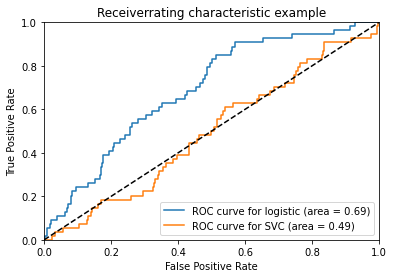

In [64]:
# Plot ROC curve
import pylab as pl
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

#### Testing accuracy using KNN 

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,random_state = 7)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
### Number of nearest neighbors
knn_clf = KNeighborsClassifier()

In [67]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
from sklearn.metrics import accuracy_score
param_grid = {'n_neighbors': list(range(1,9)),'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

#### Trying Grid Search for KNN 

In [69]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn_clf,param_grid,cv=10)

In [70]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [71]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 8}

In [72]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [73]:
gs.cv_results_['mean_test_score']

array([0.88682457, 0.92850934, 0.92172244, 0.93021875, 0.92680719,
       0.9319209 , 0.9319209 , 0.93362306, 0.88682457, 0.92850934,
       0.92172244, 0.93021875, 0.92680719, 0.9319209 , 0.9319209 ,
       0.93362306, 0.88682457, 0.92850934, 0.92172244, 0.93021875,
       0.92680719, 0.9319209 , 0.9319209 , 0.93362306, 0.88682457,
       0.92850934, 0.92172244, 0.93021875, 0.92680719, 0.9319209 ,
       0.9319209 , 0.93362306])

#### Applying Grid Search to Test set using Standard Scalar, PCA and Logistic regression

In [104]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=15)), ('clf', LogisticRegression(random_state=1))]) 
pipe_lr.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.934


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 
#pipe_svc = Pipeline([('pca', PCA(n_components=20)), ('svc', SVC())]) 

param_grid = {'pca__n_components':[14,15],'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel':['rbf','poly']} 

grid = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 5) 

grid.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 

 Best cross-validation accuracy: 0.93
 Best parameters:  {'pca__n_components': 14, 'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


#### Importing the prediction Dataset 

In [76]:
df_pred = pd.read_excel (r'Future_predictions.xlsx')
df_pred.head()

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


#### Data Cleansing for the Prediction set

In [77]:
df_pred.pop('Time')

0    2008-07-19 11:55:00
1    2008-07-19 12:32:00
2    2008-07-19 13:17:00
3    2008-07-19 14:43:00
4    2008-07-19 15:22:00
5    2008-07-19 17:53:00
6    2008-07-19 19:44:00
7    2008-07-19 19:45:00
8    2008-07-19 20:24:00
9    2008-07-19 21:35:00
10   2008-07-19 21:57:00
11   2008-07-19 22:52:00
12   2008-07-20 03:35:00
13   2008-07-21 08:21:00
14   2008-07-21 11:53:00
15   2008-07-22 00:03:00
16   2008-07-22 02:59:00
17   2008-07-22 08:41:00
Name: Time, dtype: datetime64[ns]

In [78]:
Xtest = df_pred

In [79]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')

In [80]:
Xtest=Xtest.apply(zscore)
Xtest.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.633604,0.551712,-1.265365,0.849035,0.547452,NaN,-1.620743,0.924037,-0.207971,0.747091,...,NaN,NaN,0.346901,-0.276983,-0.263185,-0.275793,NaN,NaN,NaN,NaN
1,1.978732,-0.893073,0.280677,1.060345,-1.372940,NaN,-0.187504,1.139487,-0.308727,-0.240923,...,NaN,NaN,0.587064,-0.177817,-0.176500,-0.181537,NaN,NaN,NaN,NaN
2,-1.405765,0.492377,-1.313251,2.003007,1.090140,NaN,-2.264791,0.880948,-1.677977,0.031225,...,NaN,NaN,-0.459359,-0.240150,-0.245848,-0.239049,NaN,NaN,NaN,NaN
3,-0.241923,-0.677363,-0.856119,-1.167502,0.403458,NaN,0.386215,-0.153208,-0.525740,-0.944957,...,NaN,NaN,0.089584,-0.291149,-0.306527,-0.289766,NaN,NaN,NaN,NaN
4,0.660776,-0.341670,0.387317,0.508718,1.174075,NaN,-0.777344,0.622409,-0.140800,-0.394746,...,NaN,NaN,-3.169765,4.112767,4.114396,4.113491,NaN,NaN,NaN,NaN


In [81]:
Xtest_New = Xtest.fillna(0)
Xtest_New.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.633604,0.551712,-1.265365,0.849035,0.547452,0.0,-1.620743,0.924037,-0.207971,0.747091,...,0.0,0.0,0.346901,-0.276983,-0.263185,-0.275793,0.0,0.0,0.0,0.0
1,1.978732,-0.893073,0.280677,1.060345,-1.372940,0.0,-0.187504,1.139487,-0.308727,-0.240923,...,0.0,0.0,0.587064,-0.177817,-0.176500,-0.181537,0.0,0.0,0.0,0.0
2,-1.405765,0.492377,-1.313251,2.003007,1.090140,0.0,-2.264791,0.880948,-1.677977,0.031225,...,0.0,0.0,-0.459359,-0.240150,-0.245848,-0.239049,0.0,0.0,0.0,0.0
3,-0.241923,-0.677363,-0.856119,-1.167502,0.403458,0.0,0.386215,-0.153208,-0.525740,-0.944957,...,0.0,0.0,0.089584,-0.291149,-0.306527,-0.289766,0.0,0.0,0.0,0.0
4,0.660776,-0.341670,0.387317,0.508718,1.174075,0.0,-0.777344,0.622409,-0.140800,-0.394746,...,0.0,0.0,-3.169765,4.112767,4.114396,4.113491,0.0,0.0,0.0,0.0


In [82]:
Xtest_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 590 entries, 0 to 589
dtypes: float64(590)
memory usage: 83.1 KB


In [83]:
Xtest_New

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.633604,0.551712,-1.265365,0.849035,0.547452,0.0,-1.620743,0.924037,-0.207971,0.747091,...,0.0,0.0,0.346901,-0.276983,-0.263185,-0.275793,0.0,0.0,0.0,0.0
1,1.978732,-0.893073,0.280677,1.060345,-1.372940,0.0,-0.187504,1.139487,-0.308727,-0.240923,...,0.0,0.0,0.587064,-0.177817,-0.176500,-0.181537,0.0,0.0,0.0,0.0
2,-1.405765,0.492377,-1.313251,2.003007,1.090140,0.0,-2.264791,0.880948,-1.677977,0.031225,...,0.0,0.0,-0.459359,-0.240150,-0.245848,-0.239049,0.0,0.0,0.0,0.0
3,-0.241923,-0.677363,-0.856119,-1.167502,0.403458,0.0,0.386215,-0.153208,-0.525740,-0.944957,...,0.0,0.0,0.089584,-0.291149,-0.306527,-0.289766,0.0,0.0,0.0,0.0
4,0.660776,-0.341670,0.387317,0.508718,1.174075,0.0,-0.777344,0.622409,-0.140800,-0.394746,...,0.0,0.0,-3.169765,4.112767,4.114396,4.113491,0.0,0.0,0.0,0.0
5,-1.122842,-1.365119,0.387317,0.508718,1.174075,0.0,-0.777344,0.622409,0.520573,0.776673,...,0.0,0.0,-0.613749,-0.209928,-0.224176,-0.209478,0.0,0.0,0.0,0.0
6,0.619914,-1.404871,0.280677,1.060345,-1.372940,0.0,-0.187504,1.139487,1.887240,-1.808730,...,0.0,0.0,0.432674,-0.253372,-0.232845,-0.253674,0.0,0.0,0.0,0.0
7,1.213347,2.395324,0.949879,-0.786680,-1.521275,0.0,0.993235,-1.532083,0.174386,0.717510,...,0.0,0.0,-0.013342,-0.288316,-0.267519,-0.286519,0.0,0.0,0.0,0.0
8,-0.678338,1.084701,0.949879,-0.786680,-1.521275,0.0,0.993235,-1.532083,0.704001,0.445362,...,0.0,0.0,0.141048,-0.225983,-0.215508,-0.226774,0.0,0.0,0.0,0.0
9,0.326205,-1.430446,0.949879,-0.786680,-1.521275,0.0,0.993235,-1.532083,0.763421,0.729343,...,0.0,0.0,-0.304968,-0.244872,-0.250182,-0.243840,0.0,0.0,0.0,0.0


#### Applying PCA to the Prediction set 

In [93]:
pca_ = PCA(n_components=15)
pca_.fit(Xtest_New)
Xtest_ = pca_.transform(Xtest_New)

In [94]:
type(Xtest_)

numpy.ndarray

In [95]:
Xtest_ = pd.DataFrame(Xtest_)

In [96]:
Xtest_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-3.923053,-7.946640,10.213082,0.633516,-3.554888,-5.381059,3.465329,-3.261216,-2.880800,-3.816805,9.257654,1.489370,-3.303779,0.660168,2.135261
1,-3.658483,-7.672662,0.174318,-2.075523,-11.468644,-0.995377,-6.350135,-5.636816,-0.327049,-4.331100,-6.144530,4.110890,1.487660,-2.617099,1.892082
2,-1.819877,-5.282364,-2.203124,9.873761,4.715034,-5.171326,-3.562737,3.859705,8.054370,-2.763402,1.852854,-3.680976,3.986393,-6.569661,-0.500460
3,-6.035992,-0.209640,-5.560782,8.596407,4.248716,3.232881,-5.490201,2.045413,-5.437171,4.268154,0.683512,6.469245,-4.954942,-3.702058,-1.537884
4,-2.771434,-1.524738,-12.370724,-9.049522,-3.210187,10.498712,5.226031,4.154994,-2.550471,-3.329478,4.487941,-2.152526,0.158795,-3.717324,1.579811


In [97]:
Xtest_.shape

(18, 15)

In [98]:
ytest_ = y_test[:18]

In [99]:
ytest_.shape

(18,)

In [100]:
grid.fit(Xtest_,ytest_)

/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/abishekfranklin/opt/anaconda3/lib

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [14, 15],
                         'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10],
                         'svc__kernel': ['rbf', 'poly']})

In [101]:
print(" Prediction set accuracy: {:.2f}". format( grid.score( Xtest_, ytest_)))

 Prediction set accuracy: 0.94


In [102]:
grid.predict(Xtest_)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.])

#### Used the Prediction Dataset and got an accuracy of 94% and also predicted the target variables 

End